In [19]:
from tensorflow.keras import layers,models,datasets

In [20]:
fashion_data = datasets.fashion_mnist

In [21]:
(train_img,train_labels) , (test_img , test_labels) =fashion_data.load_data()

In [22]:
train_img = train_img/255.0
test_img = test_img/255.0

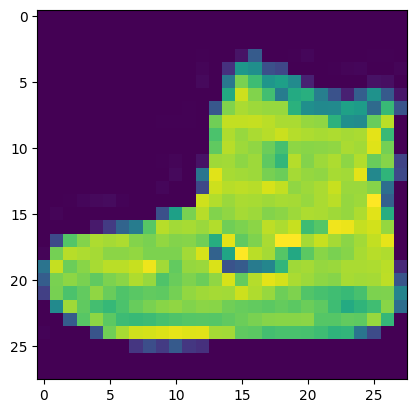

In [23]:
import matplotlib.pyplot as plt
img = train_img[0]
plt.imshow(img)

In [24]:
test_img[0].shape

(28, 28)

In [25]:
test_img = test_img.reshape(len(test_img),28,28,1)
train_img = train_img.reshape(len(train_img),28,28,1)

In [64]:
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential




In [78]:
import tensorflow as tf
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(28,28,1)))
    model.add(Conv2D(
        filters = hp.Int('conv_1_filter',
         min_value = 32 , max_value = 128 ,step = 16),
        kernel_size = hp.Choice('conv_1_kernel',values = [3,5]),
        activation = 'relu'))
    model.add(Conv2D(filters = hp.Int('conv_2_filter',
    min_value = 32, max_value = 64,step  = 16),
    kernel_size = hp.Choice('cov_2_kernal',values = [2,5]),
    activation = 'relu')) 
    
    model.add(Flatten())
    model.add(Dense(units = hp.Int('dense_1_units',
    min_value = 32 , max_value = 128 ,step = 16),
    activation = 'relu'
    ))
    model.add(Dense(units = 10 ,activation = 'softmax'))
    model.compile(optimizer = tf.keras.optimizers.Adam(hp.Choice('learning_rate',
    values = [1e-2,1e-2]))
    ,loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
    return model
    
       

In [79]:
from keras_tuner import  RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
tuned = RandomSearch(build_model,objective='val_accuracy', max_trials = 5 , directory = 'output',project_name = 'Fashion' )

In [82]:
tuned.search(train_img,train_labels,epochs = 3,validation_split = 0.1)

Epoch 1/3
 515/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 31ms/step - accuracy: 0.7043 - loss: 0.9749

KeyboardInterrupt: 